## Linear Regression Model

We use this model to find linear relationship b/w "Salary" and "Years of Experience"

#### Import necessary libraries

In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Import and understand dataset

In [24]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()  # view first 5 rows of the dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
dataset.shape # view the number of columns and rows in the dataset

(30, 2)

In [26]:
dataset.describe() # statistical analysis

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


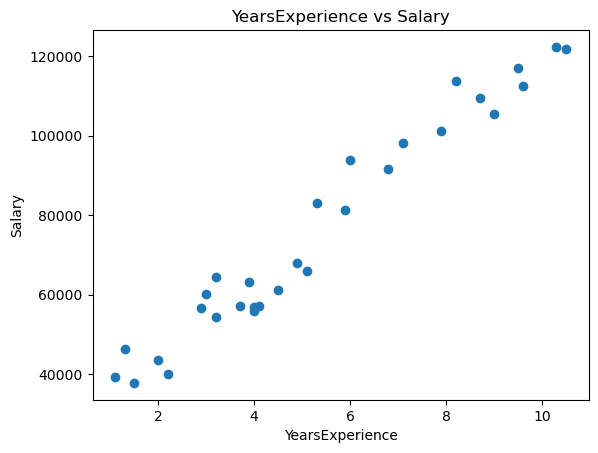

In [19]:
plt.scatter(dataset.YearsExperience,dataset.Salary)
plt.title('YearsExperience vs Salary')
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.show()

 From the plot above we can see a positive linear relation between data points

#### Preparing the dataset

In our dataset we only have two columns. We want to predict the Salary based upon Years of Experience. Therefore our attribute set which is independent variable will consist of the “YearsExperience” column, and the label which is dependent variable will be the “Salary” column. 

In [27]:
X = dataset.iloc [:, :-1].values
y = dataset.iloc[:, -1].values

In [30]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

#### Modelling

In [32]:
# We create a linear regression model and fit it to the train data
lr = LinearRegression().fit(X_train, y_train)

Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. 

To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, we execute the following code:

In [33]:
print(lr.intercept_)

26780.099150628186


In [34]:
print(lr.coef_)

[9312.57512673]


#### Prediction

In [35]:
y_pred = lr.predict(X_test)

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

To compare the actual output values for X_test with the predicted values, execute the following code:

In [36]:
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


In [37]:
# Assuming we want to predict the salary of an individual whose years of experience is 5
prediction = lr.predict([[5]])
print(prediction)

[73342.97478427]


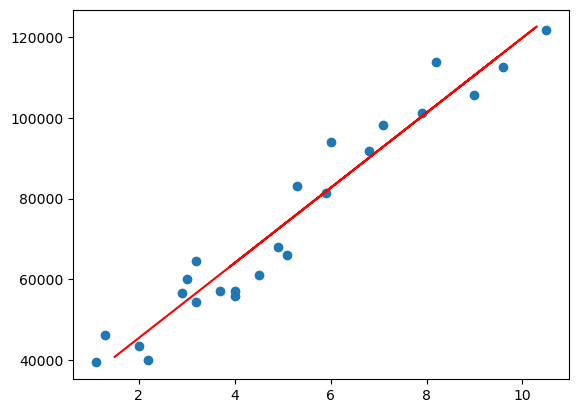

In [38]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = "red")
plt.show()

We evaluate the performance of the algorithm using the following indicators:

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2446.1723690465064
Mean Squared Error:  12823412.298126562
Root Mean Squared Error:  3580.979237321345


#### Conclusion

The Linear Regression model was applied to predict salaries based on years of experience. 

The model's intercept (the base salary when experience is zero) was approximately 26,780.10, and the coefficient (the rate of change in salary with respect to years of experience) was approximately 9,312.58. The model estimates that for each additional year of experience, a person's salary is expected to increase by around $9,312.58, and the model's predictions are reasonably close to the actual values. 

The model's predictions were compared to the actual salary values in the test dataset, and the Mean Absolute Error (MAE) was approximately 2,446.17, the Mean Squared Error (MSE) was approximately 12,823,412.30, and the Root Mean Squared Error (RMSE) was approximately 3,580.98.